In [ ]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


Imports
<br>
<br>



In [ ]:
import os
import pandas as pd
import numpy as np

import cv2    
import keras
import matplotlib.pyplot as plt
import random
!pip install -q keras
import keras
from keras.models import Model 
from keras.layers import Dropout, Dense, BatchNormalization
from keras.callbacks import ModelCheckpoint
from keras.applications.mobilenet_v2 import MobileNetV2
from keras.preprocessing.image import ImageDataGenerator, array_to_img, img_to_array, load_img

import matplotlib.pyplot as plt

plt.style.use('ggplot')

Using TensorFlow backend.


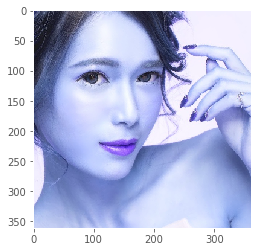

In [ ]:
import cv2 

import os

directory = '/content/drive/My Drive/MAKEUP/all/images/makeup'

for filename in os.listdir(directory):
  if filename.endswith(".png"): 
    pic_path = os.path.join(directory, filename)
    pic = cv2.imread(pic_path)
    plt.imshow(pic)
    plt.grid(False)
    plt.show()
    break

# plot with attributes




In [ ]:
from os import listdir
from numpy import asarray
from numpy import savez_compressed
from PIL import Image
from matplotlib import pyplot
# confirm mtcnn was installed correctly
!pip install mtcnn
import mtcnn
# print version,
print(mtcnn.__version__)

     |████████████████████████████████| 2.3MB 4.5MB/s 
0.1.0


In [ ]:
def padding(im):
  desired_size = 364
  old_size = im.shape[:2] # old_size is in (height, width) format
  ratio = float(desired_size)/max(old_size)
  new_size = tuple([int(x*ratio) for x in old_size])
  # new_size should be in (width, height) format

  im = cv2.resize(im, (new_size[1], new_size[0]))

  delta_w = desired_size - new_size[1]
  delta_h = desired_size - new_size[0]
  top, bottom = delta_h//2, delta_h-(delta_h//2)
  left, right = delta_w//2, delta_w-(delta_w//2)

  color = [0, 0, 0] # black background
  new_im = cv2.copyMakeBorder(im, top, bottom, left, right, cv2.BORDER_CONSTANT,
      value=color)
  return new_im
  #plt.imshow( new_im)



beard_list = []
cont = 0
directory = '/content/drive/My Drive/MAKEUP/all/images/makeup'

for filename in os.listdir(directory):
  pic_path = os.path.join(directory, filename)
  pic = cv2.imread(pic_path)
  if pic is not None :
    pic = cv2.cvtColor(pic, cv2.COLOR_RGB2BGR)
    pic=padding(pic) # I add function to make photos in 256*256 shape.
    beard_list.append(pic)
    cont += 1
    if(cont== 5):
      break


nonbeard_list = []
cont = 0
directory = '/content/drive/My Drive/MAKEUP/all/images/non-makeup'

for filename in os.listdir(directory):
  pic_path = os.path.join(directory, filename)

  pic = cv2.imread(pic_path)
  if pic is not None :
    pic = cv2.cvtColor(pic, cv2.COLOR_RGB2BGR)
    pic=padding(pic) # I add function to make photos in 256*256 shape.
    nonbeard_list.append(pic)
    cont += 1
    if(cont== 1000):
      break  

In [ ]:
print(np.array(beard_list).shape)
print(np.array(nonbeard_list).shape)

(5, 364, 364, 3)
(1000, 364, 364, 3)


In [ ]:
from numpy import savez_compressed
filename = 'makeup-5-1000.npz'
savez_compressed(filename, np.array(beard_list), np.array(nonbeard_list))

In [ ]:
#savez_compressed.save(filename, np.array(beard_list), np.array(nonbeard_list))
"""
n_samples=5
pyplot.figure(figsize = (21,21))

for i in range(n_samples):

	pyplot.subplot(2, n_samples, 1 + i)
	pyplot.axis('off')
	pyplot.imshow(np.array(beard_list)[3])
	# plot translated image
for i in range(n_samples):
	pyplot.subplot(2, n_samples, 1 + n_samples + i)
	pyplot.axis('off')
	pyplot.imshow(np.array(beard_list)[3])

  """


"\nn_samples=5\npyplot.figure(figsize = (21,21))\n\nfor i in range(n_samples):\n\n\tpyplot.subplot(2, n_samples, 1 + i)\n\tpyplot.axis('off')\n\tpyplot.imshow(np.array(beard_list)[3])\n\t# plot translated image\nfor i in range(n_samples):\n\tpyplot.subplot(2, n_samples, 1 + n_samples + i)\n\tpyplot.axis('off')\n\tpyplot.imshow(np.array(beard_list)[3])\n\n  "

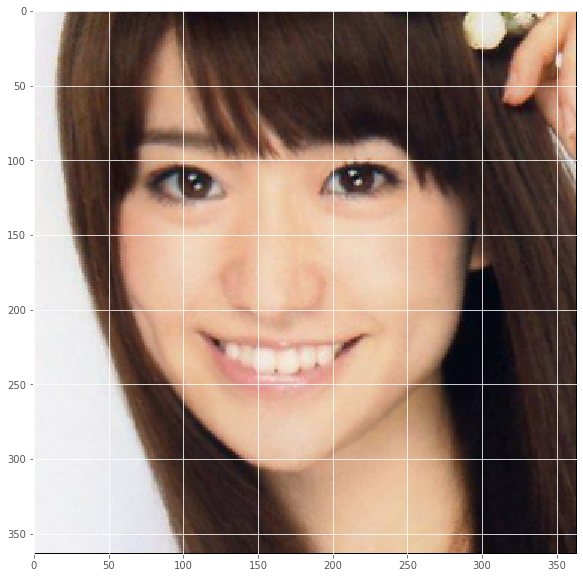

In [ ]:
#plt.imshow(np.array(nonbeard_list)[6])
plt.figure(figsize = (10,10))
plt.imshow(np.array(beard_list)[3])

In [ ]:
# Cycle Gan start

!git clone https://www.github.com/keras-team/keras-contrib.git
!cd keras-contrib
!sudo ~/anaconda3/envs/tensorflow_p36/bin/python setup.py install

Cloning into 'keras-contrib'...
remote: Enumerating objects: 12, done.
remote: Counting objects: 100% (12/12), done.
remote: Compressing objects: 100% (12/12), done.
remote: Total 3634 (delta 6), reused 0 (delta 0), pack-reused 3622
Receiving objects: 100% (3634/3634), 862.51 KiB | 3.27 MiB/s, done.
Resolving deltas: 100% (2328/2328), done.
sudo: /root/anaconda3/envs/tensorflow_p36/bin/python: command not found


In [ ]:
!pip install git+https://www.github.com/keras-team/keras-contrib.git

  Cloning https://www.github.com/keras-team/keras-contrib.git to /tmp/pip-req-build-_6dde6n6
  Running command git clone -q https://www.github.com/keras-team/keras-contrib.git /tmp/pip-req-build-_6dde6n6
  Created wheel for keras-contrib: filename=keras_contrib-2.0.8-cp36-none-any.whl size=101065 sha256=cece8fd0d8bf03c131fe297b33b363f6c51e5f56b9f333a61e3a478aac0b9e77
  Stored in directory: /tmp/pip-ephem-wheel-cache-m0x1_58d/wheels/11/27/c8/4ed56de7b55f4f61244e2dc6ef3cdbaff2692527a2ce6502ba
Successfully built keras-contrib


In [ ]:
from random import random
from numpy import load
from numpy import zeros
from numpy import ones
from numpy import asarray
from numpy.random import randint
from keras.utils import plot_model 
from keras.optimizers import Adam
from keras.initializers import RandomNormal
from keras.models import Model
from keras.models import Input
from keras.layers import Conv2D
from keras.layers import Conv2DTranspose
from keras.layers import LeakyReLU
from keras.layers import Activation
from keras.layers import Concatenate
from keras_contrib.layers.normalization.instancenormalization import InstanceNormalization
from matplotlib import pyplot

In [ ]:
# define the discriminator model
def define_discriminator(image_shape):
	# weight initialization
	init = RandomNormal(stddev=0.02)
	# source image input
	in_image = Input(shape=image_shape)
	# C64
	d = Conv2D(64, (4,4), strides=(2,2), padding='same', kernel_initializer=init)(in_image)
	d = LeakyReLU(alpha=0.2)(d)
	# C128
	d = Conv2D(128, (4,4), strides=(2,2), padding='same', kernel_initializer=init)(d)
	d = InstanceNormalization(axis=-1)(d)
	d = LeakyReLU(alpha=0.2)(d)
	# C256
	d = Conv2D(256, (4,4), strides=(2,2), padding='same', kernel_initializer=init)(d)
	d = InstanceNormalization(axis=-1)(d)
	d = LeakyReLU(alpha=0.2)(d)
	# C512
	d = Conv2D(512, (4,4), strides=(2,2), padding='same', kernel_initializer=init)(d)
	d = InstanceNormalization(axis=-1)(d)
	d = LeakyReLU(alpha=0.2)(d)
	# second last output layer
	d = Conv2D(512, (4,4), padding='same', kernel_initializer=init)(d)
	d = InstanceNormalization(axis=-1)(d)
	d = LeakyReLU(alpha=0.2)(d)
	# patch output
	patch_out = Conv2D(1, (4,4), padding='same', kernel_initializer=init)(d)
	# define model
	model = Model(in_image, patch_out)
	# compile model
	model.compile(loss='mse', optimizer=Adam(lr=0.0002, beta_1=0.5), loss_weights=[0.5])
	return model

In [ ]:
def resnet_block(n_filters, input_layer):
	# weight initialization
	init = RandomNormal(stddev=0.02)
	# first layer convolutional layer
	g = Conv2D(n_filters, (3,3), padding='same', kernel_initializer=init)(input_layer)
	g = InstanceNormalization(axis=-1)(g)
	g = Activation('relu')(g)
	# second convolutional layer
	g = Conv2D(n_filters, (3,3), padding='same', kernel_initializer=init)(g)
	g = InstanceNormalization(axis=-1)(g)
	# concatenate merge channel-wise with input layer
	g = Concatenate()([g, input_layer])
	return g

In [ ]:
def define_generator(image_shape, n_resnet=9):
	# weight initialization
	init = RandomNormal(stddev=0.02)
	# image input
	in_image = Input(shape=image_shape)
	# c7s1-64
	g = Conv2D(64, (7,7), padding='same', kernel_initializer=init)(in_image)
	g = InstanceNormalization(axis=-1)(g)
	g = Activation('relu')(g)
	# d128
	g = Conv2D(128, (3,3), strides=(2,2), padding='same', kernel_initializer=init)(g)
	g = InstanceNormalization(axis=-1)(g)
	g = Activation('relu')(g)
	# d256
	g = Conv2D(256, (3,3), strides=(2,2), padding='same', kernel_initializer=init)(g)
	g = InstanceNormalization(axis=-1)(g)
	g = Activation('relu')(g)
	# R256
	for _ in range(n_resnet):
		g = resnet_block(256, g)
	# u128
	g = Conv2DTranspose(128, (3,3), strides=(2,2), padding='same', kernel_initializer=init)(g)
	g = InstanceNormalization(axis=-1)(g)
	g = Activation('relu')(g)
	# u64
	g = Conv2DTranspose(64, (3,3), strides=(2,2), padding='same', kernel_initializer=init)(g)
	g = InstanceNormalization(axis=-1)(g)
	g = Activation('relu')(g)
	# c7s1-3
	g = Conv2D(3, (7,7), padding='same', kernel_initializer=init)(g)
	g = InstanceNormalization(axis=-1)(g)
	out_image = Activation('tanh')(g)
	# define model
	model = Model(in_image, out_image)
 
	return model

In [ ]:
def define_composite_model(g_model_1, d_model, g_model_2, image_shape):
	# ensure the model we're updating is trainable
	g_model_1.trainable = True
	# mark discriminator as not trainable
	d_model.trainable = False
	# mark other generator model as not trainable
	g_model_2.trainable = False
	# discriminator element
	input_gen = Input(shape=image_shape)
	gen1_out = g_model_1(input_gen)
	output_d = d_model(gen1_out)
	# identity element
	input_id = Input(shape=image_shape)
	output_id = g_model_1(input_id)
	# forward cycle
	output_f = g_model_2(gen1_out)
	# backward cycle
	gen2_out = g_model_2(input_id)
	output_b = g_model_1(gen2_out)
	# define model graph
	model = Model([input_gen, input_id], [output_d, output_id, output_f, output_b])
	# define optimization algorithm configuration
	opt = Adam(lr=0.0002, beta_1=0.5)
	# compile model with weighting of least squares loss and L1 loss
	model.compile(loss=['mse', 'mae', 'mae', 'mae'], loss_weights=[1, 5, 10, 10], optimizer=opt)
	return model

In [ ]:
def load_real_samples(filename):
	# load the dataset
	data = load(filename)
	# unpack arrays
	X1, X2 = data['arr_0'], data['arr_1']
	# scale from [0,255] to [-1,1]
	X1 = (X1 - 127.5) / 127.5
	X2 = (X2 - 127.5) / 127.5
	return [X1, X2]

In [ ]:
# generate a batch of images, returns images and targets
def generate_fake_samples(g_model, dataset, patch_shape):
	# generate fake instance
	X = g_model.predict(dataset)
	# create 'fake' class labels (0)
	y = zeros((len(X), patch_shape, patch_shape, 1))
	return X, y
def generate_real_samples(dataset, n_samples, patch_shape):
	# choose random instances
	ix = randint(0, dataset.shape[0], n_samples)
	# retrieve selected images
	X = dataset[ix]
	# generate 'real' class labels (1)
	y = ones((n_samples, patch_shape, patch_shape, 1))
	return X, y

In [ ]:

# save the generator models to file
def save_models(step, g_model_AtoB, g_model_BtoA):
	# save the first generator model
	filename1 = 'new_g_model_AtoB_%06d.h5' % (step+1)
	g_model_AtoB.save(filename1)
	# save the second generator model
	filename2 = 'new_g_model_BtoA_%06d.h5' % (step+1)
	g_model_BtoA.save(filename2)
	print('>Saved: %s and %s' % (filename1, filename2))


In [ ]:

# generate samples and save as a plot and save the model
def summarize_performance(step, g_model, trainX, name, n_samples=5):
	# select a sample of input images
	X_in, _ = generate_real_samples(trainX, n_samples, 0)
	# generate translated images
	X_out, _ = generate_fake_samples(g_model, X_in, 0)
	# scale all pixels from [-1,1] to [0,1]
	X_in = (X_in + 1) / 2.0
	X_out = (X_out + 1) / 2.0
	# plot real images
	
	pyplot.figure(figsize = (21,14))
	for i in range(n_samples):

		pyplot.subplot(2, n_samples, 1 + i)
		pyplot.axis('off')
		pyplot.imshow(X_in[i])
	# plot translated image
	for i in range(n_samples):
		pyplot.subplot(2, n_samples, 1 + n_samples + i)
		pyplot.axis('off')
		pyplot.imshow(X_out[i])
	# save plot to file
	filename1 = '%s_new_generated_plot_%06d.png' % (name, (step+1))
	pyplot.savefig(filename1)
	pyplot.close()

In [ ]:

# update image pool for fake images
def update_image_pool(pool, images, max_size=50):
	selected = list()
	for image in images:
		if len(pool) < max_size:
			# stock the pool
			pool.append(image)
			selected.append(image)
		elif random() < 0.5:
			# use image, but don't add it to the pool
			selected.append(image)
		else:
			# replace an existing image and use replaced image
			ix = randint(0, len(pool))
			selected.append(pool[ix])
			pool[ix] = image
	return asarray(selected)

In [ ]:
# train cyclegan models
def train(d_model_A, d_model_B, g_model_AtoB, g_model_BtoA, c_model_AtoB, c_model_BtoA, dataset):
  # define properties of the training run
  n_epochs, n_batch, = 100, 1
  # determine the output square shape of the discriminator
  n_patch = d_model_A.output_shape[1]
  # unpack dataset
  trainA, trainB = dataset
  # prepare image pool for fakes
  poolA, poolB = list(), list()
  # calculate the number of batches per training epoch
  bat_per_epo = int(len(trainA) / n_batch)
  # calculate the number of training iterations
  n_steps = bat_per_epo * n_epochs
  # manually enumerate epochs
  for i in range(n_steps):
    # select a batch of real samples
    X_realA, y_realA = generate_real_samples(trainA, n_batch, n_patch)

    X_realB, y_realB = generate_real_samples(trainB, n_batch, n_patch)
    # generate a batch of fake samples
    #print(X_realA.shape,y_realA.shape)
    #print('REALLL',y_realA.shape)
    X_fakeA, y_fakeA = generate_fake_samples(g_model_BtoA, X_realB, n_patch)
    X_fakeB, y_fakeB = generate_fake_samples(g_model_AtoB, X_realA, n_patch)
    # update fakes from pool
    #print(X_realB.shape,y_realB.shape)
    #print('REALLL B',y_realB.shape)
    X_fakeA = update_image_pool(poolA, X_fakeA)
    X_fakeB = update_image_pool(poolB, X_fakeB)
    # update generator B->A via adversarial and cycle loss

    g_loss2, _, _, _, _  = c_model_BtoA.train_on_batch([X_realB, X_realA], [y_realA, X_realA, X_realB, X_realA]) # error
    #print('a')

    # update discriminator for A -> [real/fake]
    dA_loss1 = d_model_A.train_on_batch(X_realA, y_realA)
    dA_loss2 = d_model_A.train_on_batch(X_fakeA, y_fakeA)
    # update generator A->B via adversarial and cycle loss
    g_loss1, _, _, _, _ = c_model_AtoB.train_on_batch([X_realA, X_realB], [y_realB, X_realB, X_realA, X_realB])
    # update discriminator for B -> [real/fake]
    dB_loss1 = d_model_B.train_on_batch(X_realB, y_realB)
    dB_loss2 = d_model_B.train_on_batch(X_fakeB, y_fakeB)
    # summarize performance
    print('>%d, dA[%.3f,%.3f] dB[%.3f,%.3f] g[%.3f,%.3f]' % (i+1, dA_loss1,dA_loss2, dB_loss1,dB_loss2, g_loss1,g_loss2))
    # evaluate the model performance every so often
    if (i+1) % (bat_per_epo * 1) == 0:
      # plot A->B translation
      summarize_performance(i, g_model_AtoB, trainA, 'AtoB')
      # plot B->A translation
      summarize_performance(i, g_model_BtoA, trainB, 'BtoA')
    if (i+1) % (bat_per_epo * 5) == 0:
      # save the models
      save_models(i, g_model_AtoB, g_model_BtoA)

In [ ]:
# load image data
npz_file_new="/content/drive/My Drive/MAKEUP/195-200.npz"
npz_file_old=filename
dataset = load_real_samples(npz_file_old)
print('Loaded', dataset[0].shape, dataset[1].shape)
# define input shape based on the loaded dataset
image_shape = dataset[0].shape[1:]
print('Image Shape:', image_shape)
# generator: A -> B
g_model_AtoB = define_generator(image_shape=(364,364,3))
# generator: B -> A
g_model_BtoA = define_generator(image_shape=(364,364,3))
# discriminator: A -> [real/fake]
d_model_A = define_discriminator(image_shape=(364,364,3))
# discriminator: B -> [real/fake]
d_model_B = define_discriminator(image_shape=(364,364,3))
# composite: A -> B -> [real/fake, A]
c_model_AtoB = define_composite_model(g_model_AtoB, d_model_B, g_model_BtoA, image_shape=(364,364,3))
# composite: B -> A -> [real/fake, B]
c_model_BtoA = define_composite_model(g_model_BtoA, d_model_A, g_model_AtoB, image_shape=(364,364,3))
# train models
plot_model(d_model_A, to_file='models1.png')
plot_model(d_model_B, to_file='models2.png')
plot_model(g_model_AtoB, to_file='models3.png')
plot_model(g_model_BtoA, to_file='models4.png')
plot_model(c_model_AtoB, to_file='models5.png')
plot_model(c_model_BtoA, to_file='models6.png')
g1="/content/drive/My Drive/MAKEUP/g_model_AtoB_005000.h5"
g2="/content/drive/My Drive/MAKEUP/g_model_BtoA_005000.h5"
g_model_AtoB.load_weights(g1)
g_model_BtoA.load_weights(g2)

Loaded (5, 364, 364, 3) (1000, 364, 364, 3)
Image Shape: (364, 364, 3)








In [ ]:
train(d_model_A, d_model_B, g_model_AtoB, g_model_BtoA, c_model_AtoB, c_model_BtoA, dataset)

/usr/local/lib/python3.6/dist-packages/keras/engine/training.py:493: UserWarning: Discrepancy between trainable weights and collected trainable weights, did you set `model.trainable` without calling `model.compile` after ?
  'Discrepancy between trainable weights and collected trainable'
/usr/local/lib/python3.6/dist-packages/keras/engine/training.py:493: UserWarning: Discrepancy between trainable weights and collected trainable weights, did you set `model.trainable` without calling `model.compile` after ?
  'Discrepancy between trainable weights and collected trainable'
/usr/local/lib/python3.6/dist-packages/keras/engine/training.py:493: UserWarning: Discrepancy between trainable weights and collected trainable weights, did you set `model.trainable` without calling `model.compile` after ?
  'Discrepancy between trainable weights and collected trainable'
/usr/local/lib/python3.6/dist-packages/keras/engine/training.py:493: UserWarning: Discrepancy between trainable weights and collected

>1, dA[1.304,3.388] dB[0.748,6.312] g[7.240,9.239]
>2, dA[2.595,1.623] dB[4.275,1.630] g[15.510,11.555]
>3, dA[3.565,1.718] dB[2.375,4.017] g[9.858,10.102]
>4, dA[1.098,2.657] dB[1.116,0.578] g[7.226,7.915]
>5, dA[1.307,0.865] dB[1.014,0.467] g[4.280,4.414]
>6, dA[1.791,2.821] dB[1.307,0.751] g[3.810,4.925]
>7, dA[0.715,0.827] dB[0.492,0.509] g[4.360,4.215]
>8, dA[0.655,0.476] dB[0.390,0.466] g[4.190,3.999]
>9, dA[0.329,0.362] dB[0.501,0.368] g[4.920,5.805]
>10, dA[0.325,0.370] dB[0.333,0.317] g[3.825,4.729]
>11, dA[0.253,0.271] dB[0.354,0.252] g[4.865,5.741]
>12, dA[0.183,0.233] dB[0.327,0.216] g[4.803,5.425]
>13, dA[0.420,0.279] dB[0.283,0.361] g[3.181,3.435]
>14, dA[0.081,0.298] dB[0.409,0.243] g[5.140,5.730]
>15, dA[0.276,0.223] dB[0.306,0.294] g[3.014,3.370]
>16, dA[0.250,0.283] dB[0.295,0.351] g[5.114,4.056]
>17, dA[0.206,0.235] dB[0.288,0.228] g[2.890,2.726]
>18, dA[0.207,0.223] dB[0.298,0.212] g[2.836,2.840]
>19, dA[0.172,0.234] dB[0.300,0.234] g[3.540,3.182]
>20, dA[0.133,0.19